In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("s3://full-stack-bigdata-datasets/Machine Learning Supervisé/Projet Conversion Rate/conversion_data.csv")
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [3]:
df.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


## Data visualization

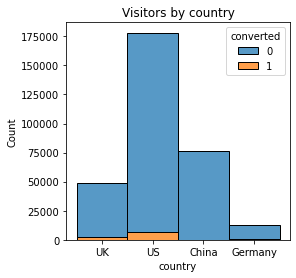

In [10]:
plt.figure(figsize=(4, 4))
plt.title("Visitors by country")
sns.histplot(x=df["country"], hue=df["converted"], multiple="stack")
plt.show()

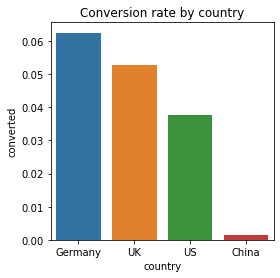

In [14]:
databycountry = df.groupby("country").mean().sort_values('converted', ascending=False)
plt.figure(figsize=(4, 4))
plt.title("Conversion rate by country")
sns.barplot(x=databycountry.index, y=databycountry['converted'])
plt.show()

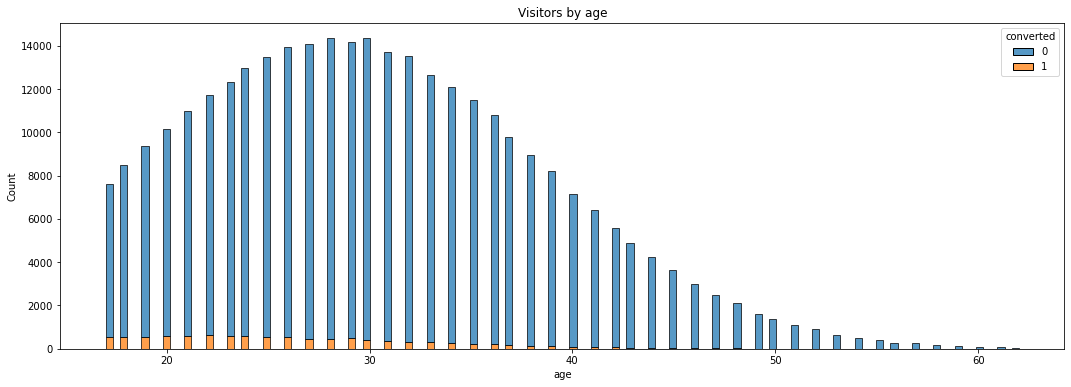

In [17]:
plt.figure(figsize=(18, 6))
plt.title("Visitors by age")
mask = df[df["age"]<63]
sns.histplot(x=mask["age"], hue=mask["converted"], multiple="stack")
plt.show()

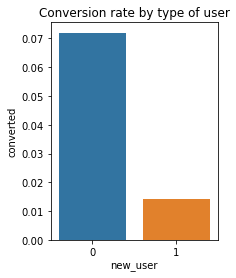

In [20]:
databyuser = df.groupby("new_user").mean()
plt.figure(figsize=(3, 4))
plt.title("Conversion rate by type of user")
sns.barplot(x=databyuser.index, y=databyuser['converted'])
plt.show()

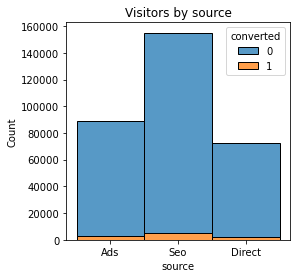

In [22]:
plt.figure(figsize=(4, 4))
plt.title("Visitors by source")
sns.histplot(x=df["source"], hue=df["converted"], multiple="stack")
plt.show()

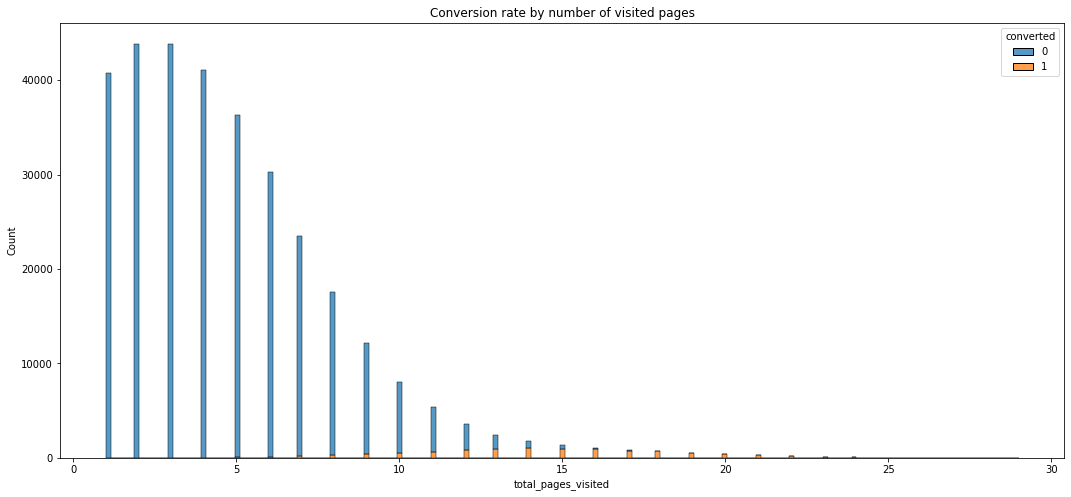

In [25]:
plt.figure(figsize=(18, 8))
plt.title("Conversion rate by number of visited pages")
sns.histplot(x=df["total_pages_visited"], hue=df["converted"], multiple="stack")
plt.show()

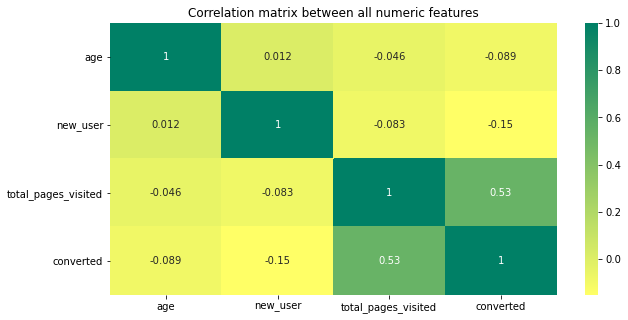

In [40]:
corr_matrix_train = df.corr()
plt.figure(figsize=(10, 5))
plt.title("Correlation matrix between all numeric features")
sns.heatmap(corr_matrix_train, annot=True, cmap = "summer_r")
plt.show()

## Preprocessing 

In [4]:
#Define X and Y and split into train and test

Y = df.loc[:, "converted"]
X = df.loc[:, ('total_pages_visited', 'new_user', 'country', 'age', 'source')]
print(X.head())
print(Y.head())

print("Convert pandas DataFrames to numpy arrays...")
X = X.values
Y = Y.tolist()
print("...Done")
print(X[0:5,:])
print()
print(Y[0:5])

print("Dividing into train and test sets...")
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify = Y)
print("...Done.")
print()

   total_pages_visited  new_user country  age source
0                    1         1      UK   25    Ads
1                    5         1      US   23    Seo
2                    4         1      US   28    Seo
3                    5         1   China   39    Seo
4                    6         1      US   30    Seo
0    0
1    0
2    0
3    0
4    0
Name: converted, dtype: int64
Convert pandas DataFrames to numpy arrays...
...Done
[[1 1 'UK' 25 'Ads']
 [5 1 'US' 23 'Seo']
 [4 1 'US' 28 'Seo']
 [5 1 'China' 39 'Seo']
 [6 1 'US' 30 'Seo']]

[0, 0, 0, 0, 0]
Dividing into train and test sets...
...Done.



In [5]:
# Create pipeline for numeric features
numeric_features = [0, 3] 
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler())
])

# Create pipeline for categorical features
categorical_features = [1, 2, 4] 
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), 
    ('encoder', OneHotEncoder(drop='first')) 
    ])

# Use ColumnTransformer to make a preprocessor object that describes all the treatments to be done
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [6]:
# Preprocessings on train set
print("Performing preprocessings on train set...")
print(X_train[0:5])
X_train = preprocessor.fit_transform(X_train)
print('...Done.')
print(X_train[0:5])
print()

# Preprocessings on test set
print("Performing preprocessings on test set...")
print(X_test[0:5])
X_test = preprocessor.transform(X_test)
print('...Done.')
print(X_test[0:5])

Performing preprocessings on train set...
[[1 1 'UK' 26 'Seo']
 [5 1 'US' 33 'Seo']
 [2 1 'US' 37 'Seo']
 [10 1 'US' 23 'Direct']
 [4 0 'China' 26 'Ads']]
...Done.
[[-1.15988055 -0.55239012  1.          0.          1.          0.
   0.          1.        ]
 [ 0.03726894  0.29450935  1.          0.          0.          1.
   0.          1.        ]
 [-0.86059317  0.7784519   1.          0.          0.          1.
   0.          1.        ]
 [ 1.53370581 -0.91534704  1.          0.          0.          1.
   1.          0.        ]
 [-0.26201843 -0.55239012  0.          0.          0.          0.
   0.          0.        ]]

Performing preprocessings on test set...
[[10 1 'US' 26 'Ads']
 [1 0 'China' 35 'Ads']
 [2 1 'US' 42 'Seo']
 [9 1 'US' 27 'Seo']
 [8 0 'US' 34 'Seo']]
...Done.
[[ 1.53370581 -0.55239012  1.          0.          0.          1.
   0.          0.        ]
 [-1.15988055  0.53648062  0.          0.          0.          0.
   0.          0.        ]
 [-0.86059317  1.383380

## Logistic regression

In [7]:
classifier = LogisticRegression()
print("Training model...")
classifier.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Training model...
...Done.
Predictions on training set...
...Done.
[0 0 0 0 0]

Predictions on test set...
...Done.
[0 0 0 0 0]



In [8]:
print("Accuracy on train set: {:.3}".format(accuracy_score(Y_train, Y_train_pred)))
print("Accuracy on test set: {:.3}".format(accuracy_score(Y_test, Y_test_pred)))
print()
print("Recall-score on train set: {:.3}".format(recall_score(Y_train, Y_train_pred)))
print("Recall-score on test set: {:.3}".format(recall_score(Y_test, Y_test_pred)))
print()
print("Precision-score on train set: {:.3}".format(precision_score(Y_train, Y_train_pred)))
print("Precision-score on test set: {:.3}".format(precision_score(Y_test, Y_test_pred)))
print()
print("F1-score on train set: {:.3}".format(f1_score(Y_train, Y_train_pred)))
print("F1-score on test set: {:.3}".format(f1_score(Y_test, Y_test_pred)))

Accuracy on train set: 0.986
Accuracy on test set: 0.986

Recall-score on train set: 0.687
Recall-score on test set: 0.688

Precision-score on train set: 0.854
Precision-score on test set: 0.86

F1-score on train set: 0.762
F1-score on test set: 0.765


In [9]:
scores = cross_val_score(classifier, X_train, Y_train, cv=20)
print('scores of logistic regression:', scores)
print('standard deviation of logistic regression:', scores.std())
print('mean of the logistic regression:', scores.mean())

scores of logistic regression: [0.98568944 0.98521505 0.98734978 0.98655914 0.98592663 0.98600569
 0.98655914 0.98418722 0.98616382 0.98458254 0.98600569 0.98561037
 0.98537318 0.98632195 0.98616382 0.98727071 0.98640101 0.98632195
 0.9868754  0.98750791]
standard deviation of logistic regression: 0.000832567471983719
mean of the logistic regression: 0.9861045224541432


In [10]:
# Determine hyperparameters for Logistic Regression using Ridge regularization 
params = {'alpha':np.arange(0,1000,10)} 
ridge = Ridge() 
grid_ridge = GridSearchCV(ridge, params, cv=10, verbose = 2)
grid_fit_ridge = grid_ridge.fit(X_train, Y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.1s
[CV] alpha=0 .........................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .......................................... alpha=0, total=   0.2s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.1s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.2s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.1s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.2s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.1s
[CV] alpha=0 .........................................................
[CV] .......................................... alpha=0, total=   0.2s
[CV] alpha=0 .........................................................
[CV] .

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:  2.6min finished


In [11]:
grid_fit_ridge.best_params_

{'alpha': 20}

In [16]:
classifier2 = LogisticRegression(C = 1/20)
print("Training model...")
classifier2.fit(X_train, Y_train) 
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred2 = classifier2.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred2 = classifier2.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

Training model...
...Done.
Predictions on training set...
...Done.
[0 0 0 0 0]

Predictions on test set...
...Done.
[0 0 0 0 0]



In [17]:
print("Accuracy on train set: {:.3}".format(accuracy_score(Y_train, Y_train_pred2)))
print("Accuracy on test set: {:.3}".format(accuracy_score(Y_test, Y_test_pred2)))
print()
print("Recall-score on train set: {:.3}".format(recall_score(Y_train, Y_train_pred2)))
print("Recall-score on test set: {:.3}".format(recall_score(Y_test, Y_test_pred2)))
print()
print("Precision-score on train set: {:.3}".format(precision_score(Y_train, Y_train_pred2)))
print("Precision-score on test set: {:.3}".format(precision_score(Y_test, Y_test_pred2)))
print()
print("F1-score on train set: {:.3}".format(f1_score(Y_train, Y_train_pred2)))
print("F1-score on test set: {:.3}".format(f1_score(Y_test, Y_test_pred2)))

Accuracy on train set: 0.986
Accuracy on test set: 0.986

Recall-score on train set: 0.681
Recall-score on test set: 0.678

Precision-score on train set: 0.859
Precision-score on test set: 0.86

F1-score on train set: 0.76
F1-score on test set: 0.758


In [18]:
scores = cross_val_score(classifier2, X_train, Y_train, cv=20)
print('scores of the best estimator:', scores)
print('standard deviation of the best estimator:', scores.std())
print('mean of the best estimator:', scores.mean())

scores of the best estimator: [0.98513599 0.98474067 0.98758697 0.98640101 0.98584756 0.98584756
 0.98655914 0.98450348 0.98616382 0.9848988  0.98632195 0.98561037
 0.98529412 0.98640101 0.98640101 0.98734978 0.9866382  0.98648008
 0.98671727 0.98695446]
standard deviation of the best estimator: 0.0008257918910370967
mean of the best estimator: 0.9860926628716005


## Decision tree

In [19]:
classifier_dtc = DecisionTreeClassifier()
print("Training model...")
classifier_dtc.fit(X_train, Y_train) 
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred_dtc = classifier_dtc.predict(X_train)
print("...Done.")
print(Y_train_pred_dtc[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred_dtc = classifier_dtc.predict(X_test)
print("...Done.")
print(Y_test_pred_dtc[0:5])
print()

print("Accuracy on train set: {:.3}".format(accuracy_score(Y_train, Y_train_pred_dtc)))
print("Accuracy on test set: {:.3}".format(accuracy_score(Y_test, Y_test_pred_dtc)))
print()
print("Recall-score on train set: {:.3}".format(recall_score(Y_train, Y_train_pred_dtc)))
print("Recall-score on test set: {:.3}".format(recall_score(Y_test, Y_test_pred_dtc)))
print()
print("Precision-score on train set: {:.3}".format(precision_score(Y_train, Y_train_pred_dtc)))
print("Precision-score on test set: {:.3}".format(precision_score(Y_test, Y_test_pred_dtc)))
print()
print("F1-score on train set: {:.4}".format(f1_score(Y_train, Y_train_pred_dtc)))
print("F1-score on test set: {:.3}".format(f1_score(Y_test, Y_test_pred_dtc)))

Training model...
...Done.
Predictions on training set...
...Done.
[0 0 0 0 0]

Predictions on test set...
...Done.
[0 0 0 0 0]

Accuracy on train set: 0.988
Accuracy on test set: 0.985

Recall-score on train set: 0.706
Recall-score on test set: 0.648

Precision-score on train set: 0.91
Precision-score on test set: 0.835

F1-score on train set: 0.7949
F1-score on test set: 0.73


In [20]:
# Determine the best hyperparameters of Decision Tree with Grid Search CV
params = {'max_depth' : np.arange(1,10),
         'min_samples_split' : [2, 5, 10, 20]} 
dtc = DecisionTreeClassifier() 

grid_dtc =  GridSearchCV(estimator=dtc, param_grid= params, cv = 10, verbose = 2)
grid_fit_dtc = grid_dtc.fit(X_train, Y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.1s
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ................. max_depth=1, min_samples_split=2, total=   0.1s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.1s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.1s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.1s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.1s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.1s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.2s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  1.8min finished


In [18]:
grid_fit_dtc.best_params_

{'max_depth': 9, 'min_samples_split': 20}

In [19]:
classifier_dtc_best = grid_fit_dtc.best_estimator_
print("Training model...")
classifier_dtc_best.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier_dtc_best.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier_dtc_best.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

print("Accuracy on train set: {:.3}".format(accuracy_score(Y_train, Y_train_pred)))
print("Accuracy on test set: {:.3}".format(accuracy_score(Y_test, Y_test_pred)))
print()
print("Recall-score on train set: {:.3}".format(recall_score(Y_train, Y_train_pred)))
print("Recall-score on test set: {:.3}".format(recall_score(Y_test, Y_test_pred)))
print()
print("Precision-score on train set: {:.3}".format(precision_score(Y_train, Y_train_pred)))
print("Precision-score on test set: {:.3}".format(precision_score(Y_test, Y_test_pred)))
print()
print("F1-score on train set: {:.4}".format(f1_score(Y_train, Y_train_pred)))
print("F1-score on test set: {:.3}".format(f1_score(Y_test, Y_test_pred)))

Training model...
...Done.
Predictions on training set...
...Done.
[0 0 0 0 0]

Predictions on test set...
...Done.
[0 0 0 0 0]

Accuracy on train set: 0.986
Accuracy on test set: 0.986

Recall-score on train set: 0.696
Recall-score on test set: 0.68

Precision-score on train set: 0.859
Precision-score on test set: 0.852

F1-score on train set: 0.7688
F1-score on test set: 0.757


## Random forest

In [22]:
classifier_rf = RandomForestClassifier()
print("Training model...")
classifier_rf.fit(X_train, Y_train) # Training is always done on train set !!
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = classifier_rf.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = classifier_rf.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

print("Accuracy on train set: {:.3}".format(accuracy_score(Y_train, Y_train_pred)))
print("Accuracy on test set: {:.3}".format(accuracy_score(Y_test, Y_test_pred)))
print()
print("Recall-score on train set: {:.3}".format(recall_score(Y_train, Y_train_pred)))
print("Recall-score on test set: {:.3}".format(recall_score(Y_test, Y_test_pred)))
print()
print("Precision-score on train set: {:.3}".format(precision_score(Y_train, Y_train_pred)))
print("Precision-score on test set: {:.3}".format(precision_score(Y_test, Y_test_pred)))
print()
print("F1-score on train set: {:.3}".format(f1_score(Y_train, Y_train_pred)))
print("F1-score on test set: {:.3}".format(f1_score(Y_test, Y_test_pred)))

Training model...
...Done.
Predictions on training set...
...Done.
[0 0 0 0 0]

Predictions on test set...
...Done.
[0 0 0 0 0]

Accuracy on train set: 0.988
Accuracy on test set: 0.985

Recall-score on train set: 0.727
Recall-score on test set: 0.675

Precision-score on train set: 0.888
Precision-score on test set: 0.822

F1-score on train set: 0.8
F1-score on test set: 0.741


In [23]:
# Determine the best hyperparamteres for Random Forest Classifier
params = {'max_depth' : np.arange(1,10),
         'min_samples_split' : [2, 5, 10, 20]}
         #'n_estimators': np.arange(start = 50,stop = 250, step = 50)} 
rfc = RandomForestClassifier() 

grid =  GridSearchCV(estimator=rfc, param_grid= params, cv = 5, verbose = 2)
grid_fit_rf = grid.fit(X_train, Y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................. max_depth=1, min_samples_split=2, total=   3.6s
[CV] max_depth=1, min_samples_split=2 ................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.6s remaining:    0.0s


[CV] ................. max_depth=1, min_samples_split=2, total=   3.6s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   3.5s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   3.5s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   3.4s
[CV] max_depth=1, min_samples_split=5 ................................
[CV] ................. max_depth=1, min_samples_split=5, total=   3.4s
[CV] max_depth=1, min_samples_split=5 ................................
[CV] ................. max_depth=1, min_samples_split=5, total=   3.5s
[CV] max_depth=1, min_samples_split=5 ................................
[CV] ................. max_depth=1, min_samples_split=5, total=   3.5s
[CV] max_depth=1, min_samples_split=5 ................................
[CV] .

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 23.3min finished


In [23]:
grid_fit_dtc.best_params_

{'max_depth': 9, 'min_samples_split': 20}

In [22]:
rfc_best = grid_fit_dtc.best_estimator_
rfc_best

DecisionTreeClassifier(max_depth=9, min_samples_split=20)

In [25]:
print("Training model...")
rfc_best.fit(X_train, Y_train) 
print("...Done.")

# Predictions on training set
print("Predictions on training set...")
Y_train_pred = rfc_best.predict(X_train)
print("...Done.")
print(Y_train_pred[0:5])
print()

# Predictions on test set
print("Predictions on test set...")
Y_test_pred = rfc_best.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])
print()

print("Accuracy on train set: {:.3}".format(accuracy_score(Y_train, Y_train_pred)))
print("Accuracy on test set: {:.3}".format(accuracy_score(Y_test, Y_test_pred)))
print()
print("Recall-score on train set: {:.3}".format(recall_score(Y_train, Y_train_pred)))
print("Recall-score on test set: {:.3}".format(recall_score(Y_test, Y_test_pred)))
print()
print("Precision-score on train set: {:.3}".format(precision_score(Y_train, Y_train_pred)))
print("Precision-score on test set: {:.3}".format(precision_score(Y_test, Y_test_pred)))
print()
print("F1-score on train set: {:.3}".format(f1_score(Y_train, Y_train_pred)))
print("F1-score on test set: {:.3}".format(f1_score(Y_test, Y_test_pred)))

Training model...
...Done.
Predictions on training set...
...Done.
[0 0 0 0 0]

Predictions on test set...
...Done.
[0 0 0 0 0]

Accuracy on train set: 0.986
Accuracy on test set: 0.986

Recall-score on train set: 0.696
Recall-score on test set: 0.68

Precision-score on train set: 0.859
Precision-score on test set: 0.852

F1-score on train set: 0.769
F1-score on test set: 0.757


In [26]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, rfc_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     61200
           1       0.85      0.68      0.76      2040

    accuracy                           0.99     63240
   macro avg       0.92      0.84      0.87     63240
weighted avg       0.98      0.99      0.99     63240



## Conclusion

The dataset is very imbalanced, meaning that there are less people who do not convert than those who convert. In this case, F1 score is more meaningful than the accuracy which presents excellent scores only due to the fact that classifiers predict the majority class (not converted). 
Logistic Regression and Random Forest performed equally on this task, with F1 scores around 0.75-0.77 and no overfitting. 